# Training DCGAN with BCE Loss on MNIST

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.utils import make_grid

import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
torch.manual_seed(0)
np.random.seed(0)

In [4]:
BATCH_SIZE = 128
LR = 2e-4
NUM_EPOCHES = 50

## Preprocessing

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

In [6]:
trainset = datasets.MNIST('../data/MNIST/', download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

## Model

In [7]:
from models.DCGAN import DCGAN_Generator, DCGAN_Discriminator

In [8]:
latent_dim = 64
g_out_size = 1
g_hidden_size = 256

d_hidden_size = 16

g = DCGAN_Generator(latent_dim, g_out_size, g_hidden_size).to(device)
d = DCGAN_Discriminator(g_out_size, d_hidden_size).to(device)
print(g)
print(d)

from utils.model import weights_init 

g = g.apply(weights_init)
d = d.apply(weights_init)

DCGAN_Generator(
  (generator): Sequential(
    (0): Sequential(
      (0): ConvTranspose2d(64, 1024, kernel_size=(3, 3), stride=(2, 2))
      (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): Sequential(
      (0): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(1, 1))
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (2): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(3, 3), stride=(2, 2))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (3): ConvTranspose2d(256, 1, kernel_size=(4, 4), stride=(2, 2))
    (4): Tanh()
  )
)
DCGAN_Discriminator(
  (discriminator): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 16, kernel_size=(4, 4), stride=(2, 2))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Le

In [9]:
for img, label in trainloader:
    img = img.to(device)
    label = label.to(device)
    
    noise = torch.randn(img.size(0), latent_dim).to(device)
    
    print("Input Image Dimensions: {}".format(img.size()))
    print("Noise Dimensions: {}".format(noise.size()))
    print("Label Dimensions: {}".format(label.size()))
    print("-"*100)
    
    fake = g(noise)
    pred = d(fake)
    
    print("Fake Output Dimensions: {}".format(fake.size()))
    print("Prediction Output Dimensions: {}".format(pred.size()))
    break

Input Image Dimensions: torch.Size([128, 1, 28, 28])
Noise Dimensions: torch.Size([128, 64])
Label Dimensions: torch.Size([128])
----------------------------------------------------------------------------------------------------
Fake Output Dimensions: torch.Size([128, 1, 28, 28])
Prediction Output Dimensions: torch.Size([128, 1])


## Training

In [10]:
criterion = nn.BCEWithLogitsLoss()
g_optimizer = torch.optim.Adam(g.parameters(), lr=LR, betas=(0.5, 0.999))
d_optimizer = torch.optim.Adam(d.parameters(), lr=LR, betas=(0.5, 0.999))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1: Generator Loss: 0.7038218029526505; Discriminator Loss: 0.6838830332003677


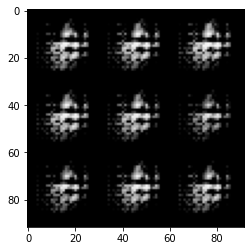

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 2: Generator Loss: 0.7780217033332345; Discriminator Loss: 0.6646834169623694


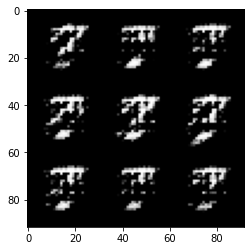

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 3: Generator Loss: 0.7525151324933017; Discriminator Loss: 0.6801507581017419


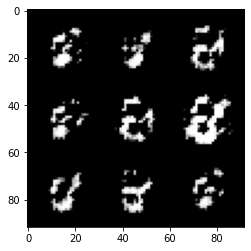

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 4: Generator Loss: 0.7174506825424715; Discriminator Loss: 0.6914036479840147


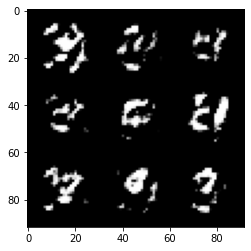

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 5: Generator Loss: 0.7235805000831832; Discriminator Loss: 0.6835468358068324


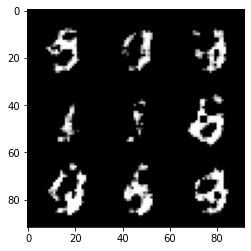

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 6: Generator Loss: 0.7156391381454874; Discriminator Loss: 0.6852935129391359


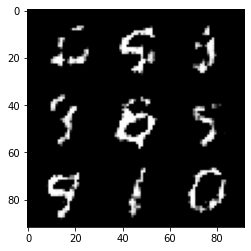

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 7: Generator Loss: 0.706452930532793; Discriminator Loss: 0.6913852894992463


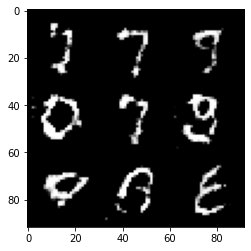

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 8: Generator Loss: 0.7015966756511599; Discriminator Loss: 0.6931826792546173


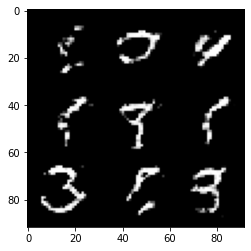

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 9: Generator Loss: 0.6979163378032286; Discriminator Loss: 0.6940462096159392


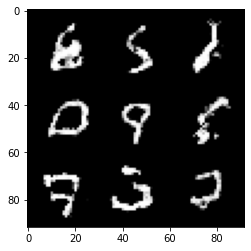

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 10: Generator Loss: 0.6952246327135863; Discriminator Loss: 0.6949074316634807


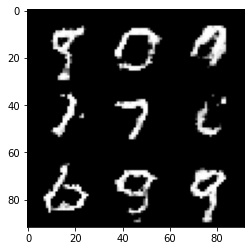

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 11: Generator Loss: 0.6959619382297052; Discriminator Loss: 0.6950180724993952


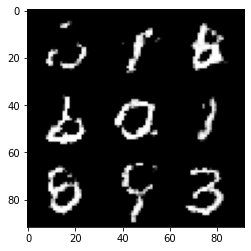

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 12: Generator Loss: 0.69463619494489; Discriminator Loss: 0.6943034206880435


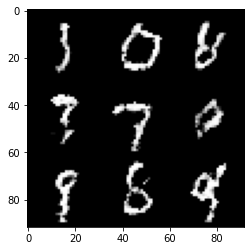

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 13: Generator Loss: 0.6949990509923841; Discriminator Loss: 0.6942734267157532


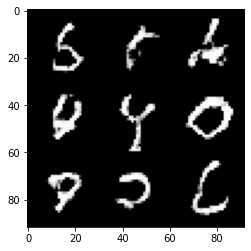

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 14: Generator Loss: 0.6957775872907659; Discriminator Loss: 0.6941370403588708


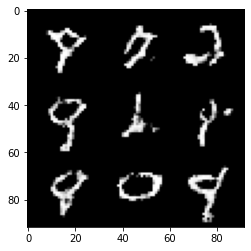

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 15: Generator Loss: 0.6944808729930219; Discriminator Loss: 0.6937905698696941


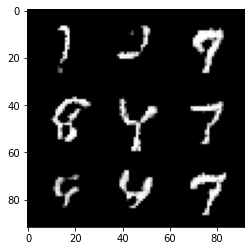

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 16: Generator Loss: 0.6954709709580265; Discriminator Loss: 0.6937749824290083


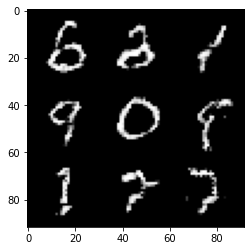

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 17: Generator Loss: 0.6952310883160084; Discriminator Loss: 0.6937342649583877


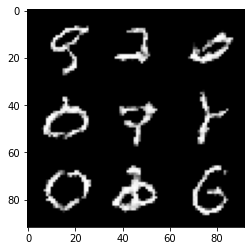

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 18: Generator Loss: 0.6950722824790077; Discriminator Loss: 0.6937633108482686


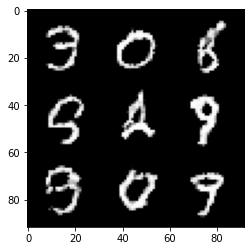

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 19: Generator Loss: 0.6950420982547915; Discriminator Loss: 0.6936129737002


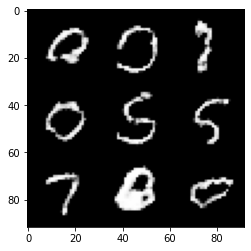

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 20: Generator Loss: 0.6951015847069877; Discriminator Loss: 0.6936743240366613


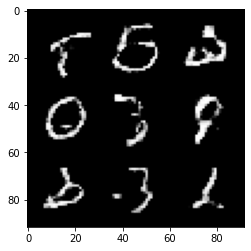

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 21: Generator Loss: 0.694341670348446; Discriminator Loss: 0.6936049632934619


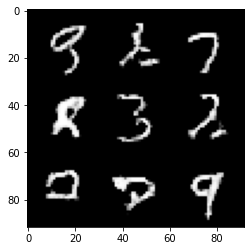

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 22: Generator Loss: 0.6949361370824801; Discriminator Loss: 0.6936348036153993


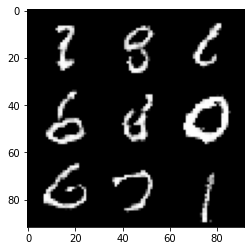

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 23: Generator Loss: 0.6945525379831603; Discriminator Loss: 0.6935512464183734


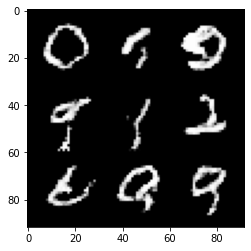

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 24: Generator Loss: 0.6943654348092801; Discriminator Loss: 0.693586214264827


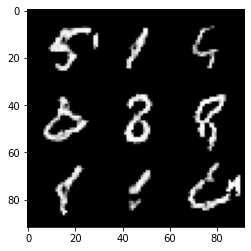

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 25: Generator Loss: 0.6941563391736322; Discriminator Loss: 0.6935822679035699


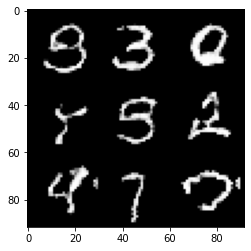

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 26: Generator Loss: 0.6940720880717866; Discriminator Loss: 0.6934933905154149


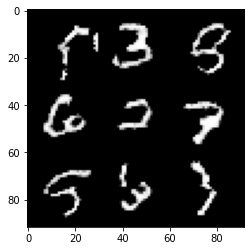

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 27: Generator Loss: 0.694159705882896; Discriminator Loss: 0.6934939527562433


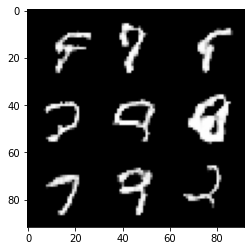

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 28: Generator Loss: 0.6939920258166185; Discriminator Loss: 0.693437648353292


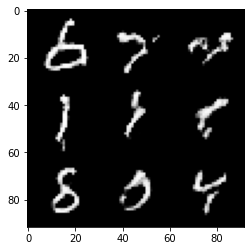

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 29: Generator Loss: 0.6940497654333297; Discriminator Loss: 0.6934080516605743


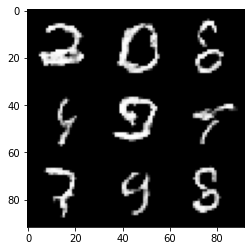

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 30: Generator Loss: 0.6941526694846815; Discriminator Loss: 0.693420171102227


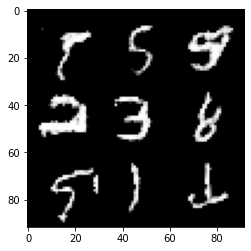

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 31: Generator Loss: 0.6936543932093232; Discriminator Loss: 0.6934052201222255


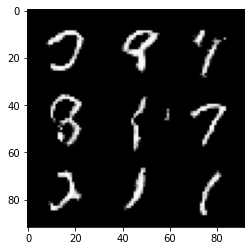

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 32: Generator Loss: 0.6938792070600269; Discriminator Loss: 0.6933691739273478


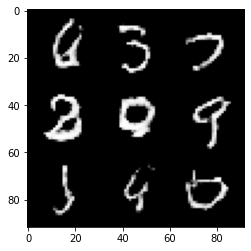

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 33: Generator Loss: 0.6939589993785947; Discriminator Loss: 0.6935995649427239


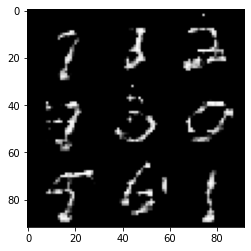

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 34: Generator Loss: 0.6938907036394961; Discriminator Loss: 0.6935007175657032


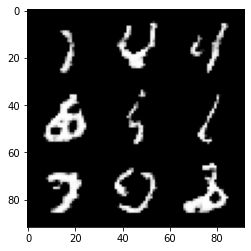

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 35: Generator Loss: 0.6934150271832562; Discriminator Loss: 0.6934468272144098


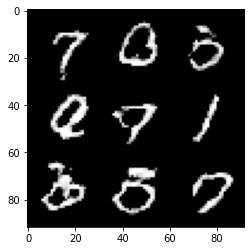

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 36: Generator Loss: 0.6932927875884815; Discriminator Loss: 0.6932914354907933


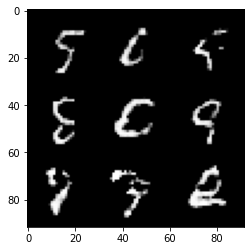

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 37: Generator Loss: 0.6931812360342632; Discriminator Loss: 0.6932752110810676


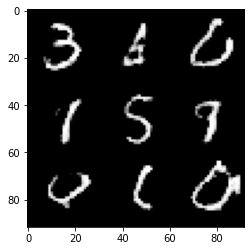

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 38: Generator Loss: 0.6934634654252514; Discriminator Loss: 0.6932518066627893


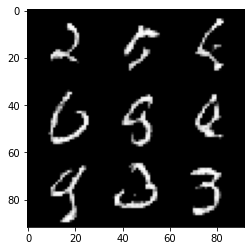

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 39: Generator Loss: 0.6931947418875786; Discriminator Loss: 0.6932705249359359


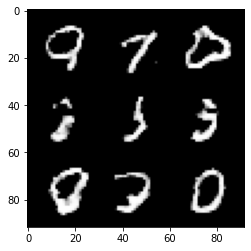

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 40: Generator Loss: 0.6934196675764218; Discriminator Loss: 0.6933629599207246


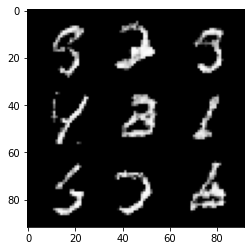

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 41: Generator Loss: 0.6932029994820227; Discriminator Loss: 0.6932536796974474


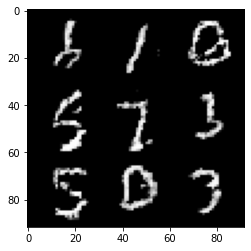

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 42: Generator Loss: 0.6932725127317758; Discriminator Loss: 0.6932273856612411


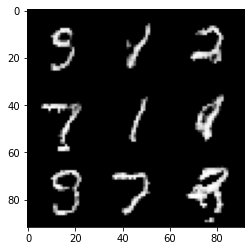

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 43: Generator Loss: 0.6931935608514083; Discriminator Loss: 0.6931944950811391


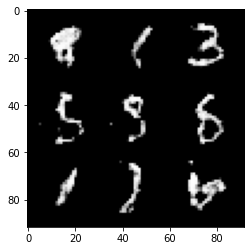

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 44: Generator Loss: 0.6932289920636078; Discriminator Loss: 0.6932074923250975


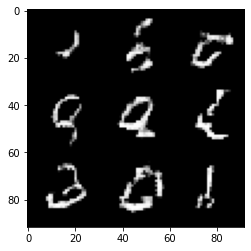

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 45: Generator Loss: 0.6933738687145177; Discriminator Loss: 0.693205839408232


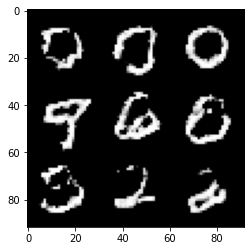

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 46: Generator Loss: 0.6931386757761177; Discriminator Loss: 0.6931988384677912


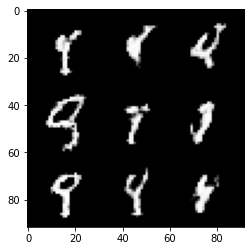

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 47: Generator Loss: 0.6934330305819318; Discriminator Loss: 0.6932255926925236


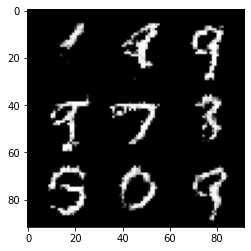

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 48: Generator Loss: 0.6934065578588798; Discriminator Loss: 0.6932789302075596


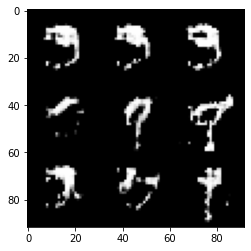

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 49: Generator Loss: 0.6936070486934963; Discriminator Loss: 0.6932239861630681


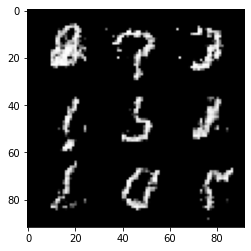

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 50: Generator Loss: 0.6933452211209198; Discriminator Loss: 0.6932469497103173


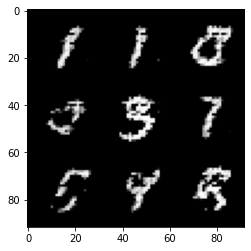

In [11]:
loss_hist = {}
loss_hist["generator loss"] = []
loss_hist["discriminator loss"] = []

for epoch in range(1, NUM_EPOCHES+1):
    
    epoch_d_loss = 0
    epoch_g_loss = 0
    
    for real, label in trainloader:
        b = real.size(0)
        real = real.to(device)
        
        d_optimizer.zero_grad()
        noise = torch.randn(b, latent_dim).to(device)
        fake = g(noise)
        fake_pred = d(fake.detach())
        real_pred = d(real)
        fake_loss = criterion(fake_pred, torch.zeros_like(fake_pred))
        real_loss = criterion(real_pred, torch.ones_like(real_pred))
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        epoch_d_loss += d_loss.item()
        d_optimizer.step()
        
        g_optimizer.zero_grad()
        noise = torch.randn(b, latent_dim).to(device)
        fake = g(noise)
        pred = d(fake)
        g_loss = criterion(pred, torch.ones_like(pred))
        g_loss.backward()
        epoch_g_loss += g_loss.item()
        g_optimizer.step()
        
    epoch_g_loss /= len(trainloader)
    epoch_d_loss /= len(trainloader)
    
    loss_hist["generator loss"].append(epoch_g_loss)
    loss_hist["discriminator loss"].append(epoch_d_loss)
    
    print("Epoch {}: Generator Loss: {}; Discriminator Loss: {}".format(epoch, epoch_g_loss, epoch_d_loss))
    
    if epoch%1==0:
        noise = torch.randn(b, latent_dim).to(device)
        fake = g(noise)
    
        images = fake.detach().to("cpu")
        images_grid = make_grid(images[:9], nrow=3)
        plt.imshow(images_grid.permute(1, 2, 0).squeeze())
        plt.show()